In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

In [0]:
def predict(x, w, b):
  return np.dot(x, w) + b

def cost(y_hat, y):
  return (y_hat - y)**2

def L1_cost(y_hat, y, w, lmbda=1.5):
  return (y_hat - y)**2 + (lmbda * np.sum(w))

def L2_cost(y_hat, y, w, lmbda=1):
  return (y_hat - y)**2 + (lmbda * np.sum(w**2))

def create_plot_axes(x, y, b):
  cost_non_reg = []
  cost_L1 = []
  cost_L2 = []
  weights = []

  for w in range(-100, 100):
    w *= 0.01
    weights.append(w)
    cost_non_reg.append(cost(predict(x, w, b), y))
    cost_L1.append(L1_cost(predict(x, w, b), y, w))
    cost_L2.append(L2_cost(predict(x, w, b), y, w))

  return cost_non_reg, cost_L1, cost_L2, weights

def plot_cost_vs_param(weights, cost):
  plt.figure(figsize=(8, 8))
  plt.plot(weights, cost)
  plt.plot(weights[np.argmin(cost)], cost[np.argmin(cost)], 'ro', label='point')
  plt.plot([np.min(weights), weights[np.argmin(cost)]], [cost[np.argmin(cost)], cost[np.argmin(cost)]])
  plt.plot([weights[np.argmin(cost)], weights[np.argmin(cost)]], [0, cost[np.argmin(cost)]])
  plt.annotate('Weight: ' + str(weights[np.argmin(cost)]) + ', Cost: ' + str(cost[np.argmin(cost)]) + ', bias: ' + str(b), (weights[np.argmin(cost)] + 0.1, cost[np.argmin(cost)] + 0.1))
  plt.xlabel('Weights')
  plt.ylabel('Squared Cost')
  plt.show()

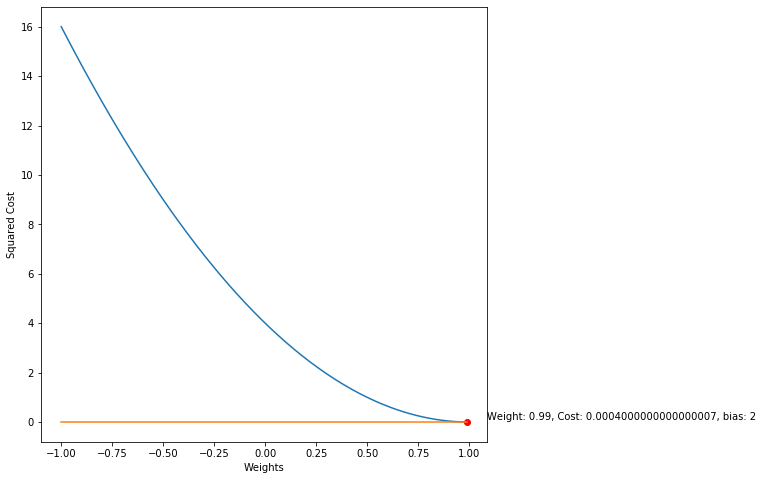

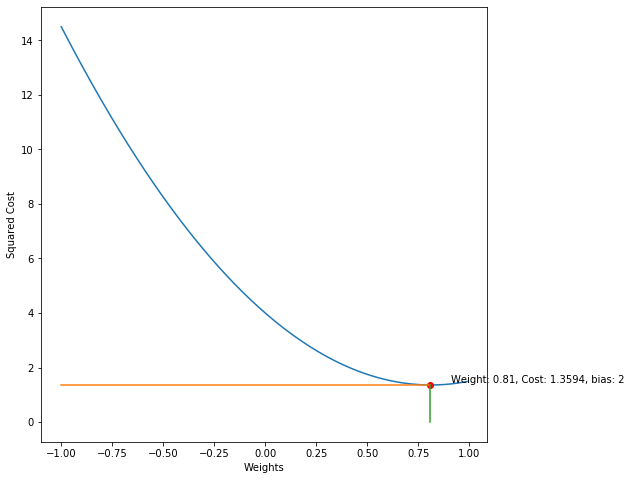

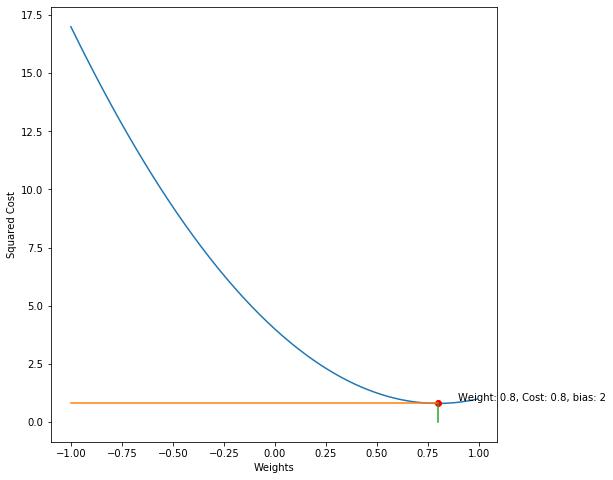

In [0]:
x = 2
y = 4
b = 2
cost_non_reg, cost_L1, cost_L2, weights = create_plot_axes(x, y, b)
plot_cost_vs_param(weights, cost_non_reg)
plot_cost_vs_param(weights, cost_L1)
plot_cost_vs_param(weights, cost_L2)

# print("Min cost: ", np.min(cost_L1))
# print(weights[np.argmin(cost_L1)])

In [0]:

size = 100
 
#We run the method 10 times with different random seeds
for i in range(10):
    np.random.seed(seed=i)
    X_seed = np.random.normal(0, 1, size)
    X1 = X_seed + np.random.normal(0, .1, size)
    X2 = X_seed + np.random.normal(0, .1, size)
    X3 = X_seed + np.random.normal(0, .1, size)
    Y = X1 + X2 + 0.01*X3 + np.random.normal(0, 1, size)
    X = np.array([X1, X2, X3]).T
 
 
    lr = LinearRegression()
    lr.fit(X,Y)
    print( "Linear model:", (lr.coef_))

    lasso = Lasso()
    lasso.fit(X,Y)
    print( "Lasso model:", (lasso.coef_))
 
    ridge = Ridge(alpha=10)
    ridge.fit(X,Y)
    print( "Ridge model:", (ridge.coef_))

    print('------------------------------')


Linear model: [ 0.7284403   2.30926001 -1.07219169]
Lasso model: [0.05614919 0.96617472 0.        ]
Ridge model: [0.64667214 0.76222235 0.51480134]
------------------------------
Linear model: [ 1.15181561  2.36579916 -1.58900864]
Lasso model: [0.48750414 0.20452565 0.        ]
Ridge model: [0.69993103 0.79213361 0.37657519]
------------------------------
Linear model: [0.69734749 0.32155864 1.09590886]
Lasso model: [1.1588196 0.        0.       ]
Ridge model: [0.68691148 0.650573   0.71043626]
------------------------------
Linear model: [0.28735446 1.25386129 0.50054726]
Lasso model: [0.         1.00719754 0.14453285]
Ridge model: [0.62630719 0.72513349 0.63843921]
------------------------------
Linear model: [0.18726691 0.77214206 1.1994915 ]
Lasso model: [0.26409176 0.         0.84811772]
Ridge model: [0.65923076 0.69635845 0.72836038]
------------------------------
Linear model: [-1.2912413   1.59097473  1.75727029]
Lasso model: [0.         0.03023031 0.86900274]
Ridge model: [0.4

In [0]:
def predict(x, w, b):
  return np.dot(x, w) + b

def noreg_cost(y_hat, y, w):
  return (y_hat - y)**2

def gradient_noreg_cost(y_hat, y, x, w):
  return (y_hat - y) * 2 * x

def L1_cost(y_hat, y, w, lmbda=1.1):
  return (y_hat - y)**2 + (lmbda * np.sum(w))

def gradient_L1_cost(y_hat, y, x, w, lmbda=1.1):
  signs = []
  for weight in w: 
    if weight < 0:
      signs.append(-1)
    else:
      signs.append(1)

  return ((y_hat - y) * 2 * x) + (lmbda * np.array(signs))

def L2_cost(y_hat, y, w, lmbda=1.6):
  return (y_hat - y)**2 + (lmbda * np.sum(w**2))

def gradient_L2_cost(y_hat, y, x, w, lmbda=1.6):
  return ((y_hat - y) * 2 * x) + (2 * lmbda * w)

def generate_synthetic_data(n, p, seed):
  X = []
  y = []

  for i in range(n):
    X.append([])
    label = 0
    for j in range(p):
      feature = seed + np.random.normal(0, 0.2, 1)
      X[i].append(feature[0])

    for feature in X[i]:
      label += feature 
    label += np.random.normal(-0.1, 0.1, 1)
    y.append(label)

  return np.array(X), np.array(y)

def plot_costs_over_time(costs_over_time):
  y_axis = []
  x_axis = []
  counter = 1
  for cost in costs_over_time:
    y_axis.append(cost[0])
    x_axis.append(counter)
    counter += 1
  return x_axis, y_axis

def print_changes_over_time(thetas_over_time, grads_theta_over_time, costs_over_time, no_reg_learning_rate_over_time):
  for iteration in range(len(thetas_over_time)):
    print('--------------------------')
    print('Iteration: ' + str(iteration + 1))
    print('Weights: ' + str(thetas_over_time[iteration]))
    print('Gradients_dl/dw: ' + str(grads_theta_over_time[iteration]))
    print('Cost: ' + str(costs_over_time[iteration]))
    print('Learning Rate: ' + str(no_reg_learning_rate_over_time[iteration]))
    
def linear_reg(cost_function, gradient_function, iterations = 30, eps=0.000000001):

  # Number of samples, number of features, seed to add to x. 
  x, y = generate_synthetic_data(5, 8, 2)
  bias = 0.5
  lr = 0.2

  theta = np.random.uniform(-1, 1, len(x[0]))

  thetas_over_time = []
  costs_over_time = []
  grads_theta_over_time = []
  sum_of_squared_gradients = []
  learning_rate_over_time = []

  for i in range(iterations):

    mean_lr = 0
    mean_grads_theta = 0
    mean_cost = 0
    mean_counter = 0

    for j in range(len(y)):

      y_hat = predict(theta, x[j], bias)
      cost = np.abs(cost_function(y_hat, y[j], theta))
      grads_theta = gradient_function(y_hat, y[j], x[j], theta)

      mean_cost += cost
      mean_grads_theta += grads_theta
      mean_counter += 1

    mean_cost /= mean_counter
    mean_grads_theta /= mean_counter

    adagard_term = np.sqrt(np.sum(grads_theta**2) + eps)
    adagrad_lr = (lr / adagard_term)
    theta -= adagrad_lr * grads_theta

    thetas_over_time.append(theta.copy())
    grads_theta_over_time.append(mean_grads_theta.copy())
    costs_over_time.append(mean_cost.copy())
    learning_rate_over_time.append(adagrad_lr)

    # No adaptive learning rate
    # learning_rate_over_time.append(lr)
    # theta -= lr * grads_theta
    
  return thetas_over_time, grads_theta_over_time, costs_over_time, learning_rate_over_time

no_reg_thetas_over_time, no_reg_grads_theta_over_time, no_reg_costs_over_time, no_reg_learning_rate_over_time = linear_reg(noreg_cost, gradient_noreg_cost)
print_changes_over_time(no_reg_thetas_over_time, no_reg_grads_theta_over_time, no_reg_costs_over_time, no_reg_learning_rate_over_time)


--------------------------
Iteration: 1
Weights: [-0.91459191 -0.82043546  0.49018729  0.39808937  0.04367224 -0.20839215
 -0.30692579  0.81613899]
Gradients_dl/dw: [-72.14237216 -70.75034999 -71.46162316 -75.57033352 -71.70114223
 -71.72491357 -78.42231708 -74.31460092]
Cost: [320.65199154]
Learning Rate: 0.0009790434255879034
--------------------------
Iteration: 2
Weights: [-0.84727495 -0.74287194  0.55927933  0.47743543  0.10565403 -0.14007733
 -0.23367867  0.88328826]
Gradients_dl/dw: [-67.49236588 -66.18962738 -66.85109693 -70.69424273 -67.0714078
 -67.10092043 -73.36318489 -69.52240578]
Cost: [280.62959639]
Learning Rate: 0.0010459945423222144
--------------------------
Iteration: 3
Weights: [-0.77995799 -0.66530841  0.62837136  0.55678149  0.16763582 -0.07176252
 -0.16043155  0.95043752]
Gradients_dl/dw: [-62.8423596  -61.62890478 -62.2405707  -65.81815193 -62.44167337
 -62.4769273  -68.30405271 -64.73021065]
Cost: [243.27462617]
Learning Rate: 0.0011227746028782428
-----------

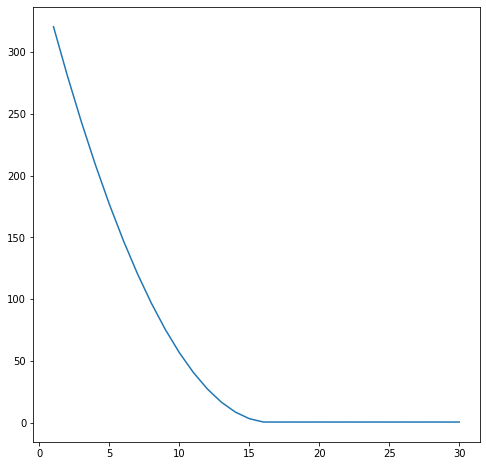

In [0]:


x_axis, y_axis = plot_costs_over_time(no_reg_costs_over_time)
plt.figure(figsize=(8, 8))
plt.plot(x_axis, y_axis)

In [0]:

L1_thetas_over_time, L1_grads_theta_over_time, L1_costs_over_time, L1_learning_rate_over_time = linear_reg(L1_cost, gradient_L1_cost)
print_changes_over_time(L1_thetas_over_time, L1_grads_theta_over_time, L1_costs_over_time, L1_learning_rate_over_time)

--------------------------
Iteration: 1
Weights: [ 0.57540344  0.63765135  0.70453037  0.53568863 -0.03235304 -0.66979695
 -0.16458519  0.25922598]
Gradients_dl/dw: [-55.32427734 -52.46228265 -52.98866982 -51.63415783 -55.48119175
 -53.5557459  -59.47103077 -53.46367205]
Cost: [176.98678672]
Learning Rate: 0.0013707005516547027
--------------------------
Iteration: 2
Weights: [ 0.65818641  0.71188751  0.76893427  0.60496855  0.02620679 -0.60564014
 -0.08838677  0.33227975]
Gradients_dl/dw: [-50.3702232  -47.75775222 -48.24399532 -47.00941201 -50.72559931
 -48.96088338 -54.36187889 -48.67912332]
Cost: [148.18946771]
Learning Rate: 0.0015090356401213432
--------------------------
Iteration: 3
Weights: [ 0.74128517  0.78638765  0.83354255  0.6744824   0.08159557 -0.54090838
 -0.0115404   0.40559034]
Gradients_dl/dw: [-45.41570748 -43.05277086 -43.49884911 -42.38420295 -43.76948182
 -44.36554176 -49.2521745  -43.89410307]
Cost: [122.08674505]
Learning Rate: 0.0016873025121688472
----------

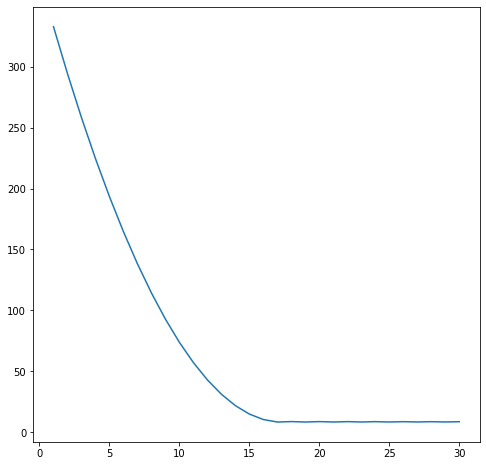

In [0]:
x_axis, y_axis = plot_costs_over_time(L1_costs_over_time)
plt.figure(figsize=(8, 8))
plt.plot(x_axis, y_axis)

In [0]:
L2_thetas_over_time, L2_grads_theta_over_time, L2_costs_over_time, L2_learning_rate_over_time = linear_reg(L2_cost, gradient_L2_cost)
print_changes_over_time(L2_thetas_over_time, L2_grads_theta_over_time, L2_costs_over_time, L2_learning_rate_over_time)

--------------------------
Iteration: 1
Weights: [-0.01464391 -0.15561377  0.732753   -0.80864221 -0.01713092 -0.7021134
 -0.4059831  -0.492662  ]
Gradients_dl/dw: [-72.22787316 -79.79216391 -70.62567023 -85.0603105  -75.81884784
 -81.35831138 -86.52163186 -81.26574818]
Cost: [405.78162091]
Learning Rate: 0.0008968015204676973
--------------------------
Iteration: 2
Weights: [ 0.05070633 -0.07499626  0.79393466 -0.73706239  0.05052371 -0.62390279
 -0.33999115 -0.41976268]
Gradients_dl/dw: [-68.07001589 -75.19236041 -66.4342149  -80.31942239 -71.45710301
 -76.78022068 -81.65037715 -76.67404071]
Cost: [362.36690799]
Learning Rate: 0.0009511658759005158
--------------------------
Iteration: 3
Weights: [ 0.1160145   0.00559529  0.85493612 -0.66537914  0.11813516 -0.54561339
 -0.27396789 -0.34682044]
Gradients_dl/dw: [-63.91232877 -70.59269053 -62.24332991 -75.57829004 -67.09552907
 -72.2019614  -76.779084   -72.08226302]
Cost: [321.49952854]
Learning Rate: 0.001012544151844763
------------

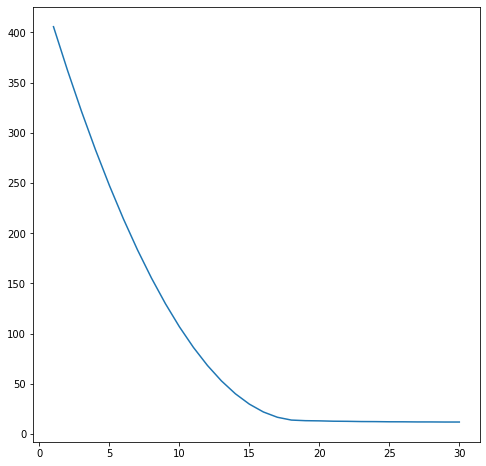

In [0]:
x_axis, y_axis = plot_costs_over_time(L2_costs_over_time)
plt.figure(figsize=(8, 8))
plt.plot(x_axis, y_axis)

In [0]:

def get_L1_graph():
  w1 = []
  w2 = []

  for w in range(-100, 100):
    w *= 0.01
    w1.append(w)
    w2.append(np.abs(1 - np.abs(w)))

    # w1.append(-w)
    # w2.append(-(1 - np.abs(w)))

  # w1 = np.sort(w1)
  # w2 = np.sort(w2)
  # for w in range(-100, 100):
  #   w *= 0.01
  #   w1.append(w)
  #   w2.append(-(1 - np.abs(w)))

  return w1, w2

In [0]:
w1, w2 = get_L1_graph()

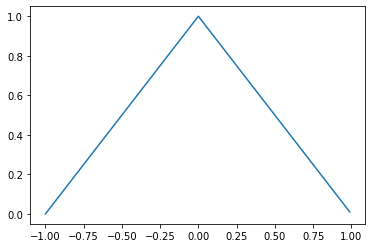

In [0]:
plt.plot(w1, w2)

In [0]:
def create_3d_plot_axes(x, y):
  cost_L1 = []

  w1, w2 = get_L1_graph()
  weight_vectors_l1 = np.column_stack((w1, w2))

  for w_v in weight_vectors_l1:

    cost_L1.append(L1_cost(predict(x, w_v), y, w_v))

  return cost_L1, weight_vectors_l1, w1, w2

x = [1, 2]
y = 3

cost_L1, weight_vectors_l1, w1, w2 = create_3d_plot_axes(x, y)

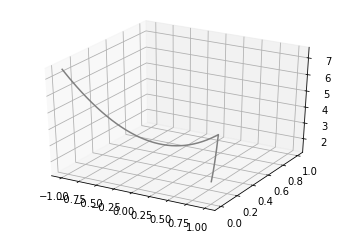

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot3D(w1, w2, cost_L1, 'gray')

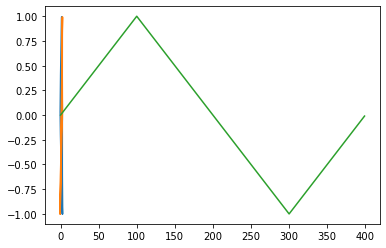

In [0]:
plt.plot(cost_L1, w1, w2)